# Que_1 Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years ###

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import dataset
data=pd.read_csv("50_Startups.csv")

# EDA ###

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data1[data1.duplicated()]  # No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [7]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Analysis

In [8]:

data1.corr()

C:\Users\Kajal\AppData\Local\Temp\ipykernel_1276\1366114360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


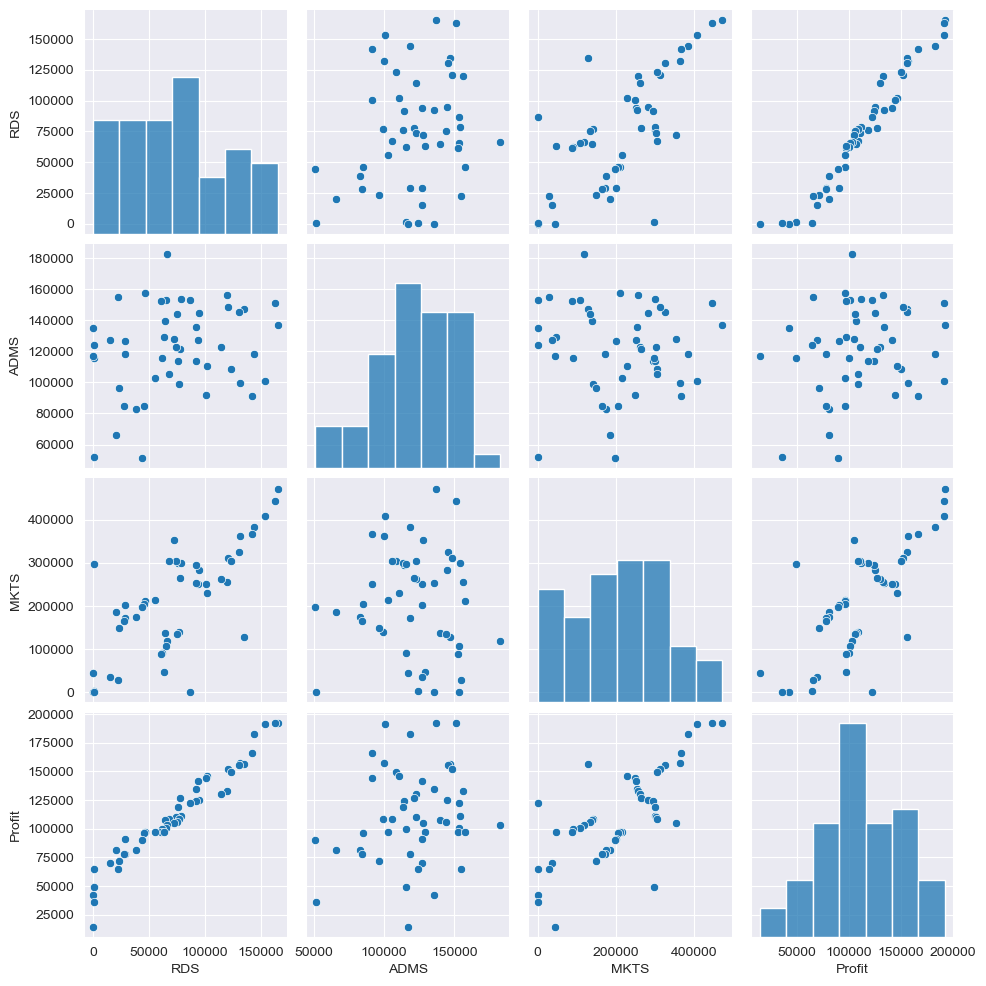

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model Building

In [10]:

model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

# Model Testing

In [11]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [12]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [13]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [14]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues  # ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [15]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [16]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation 

# Two Techniques: 1 Collinearity check & 2.Residual Analysis

In [17]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid

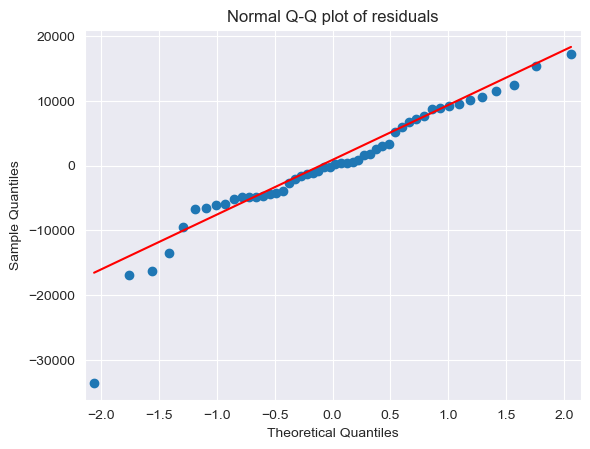

In [19]:

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [21]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

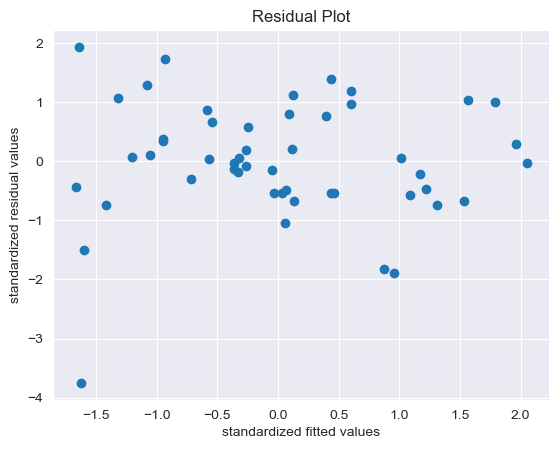

In [22]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


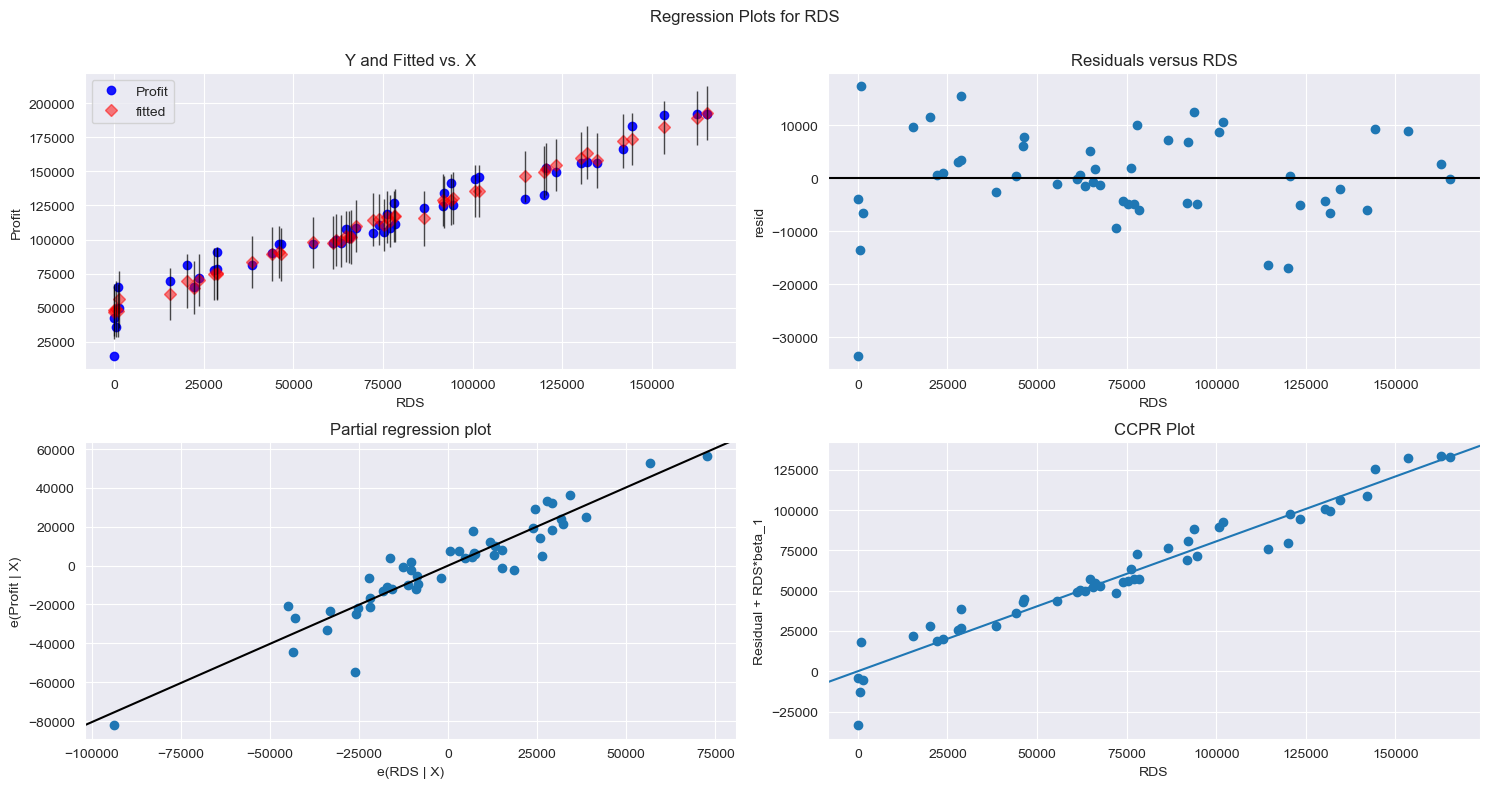

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


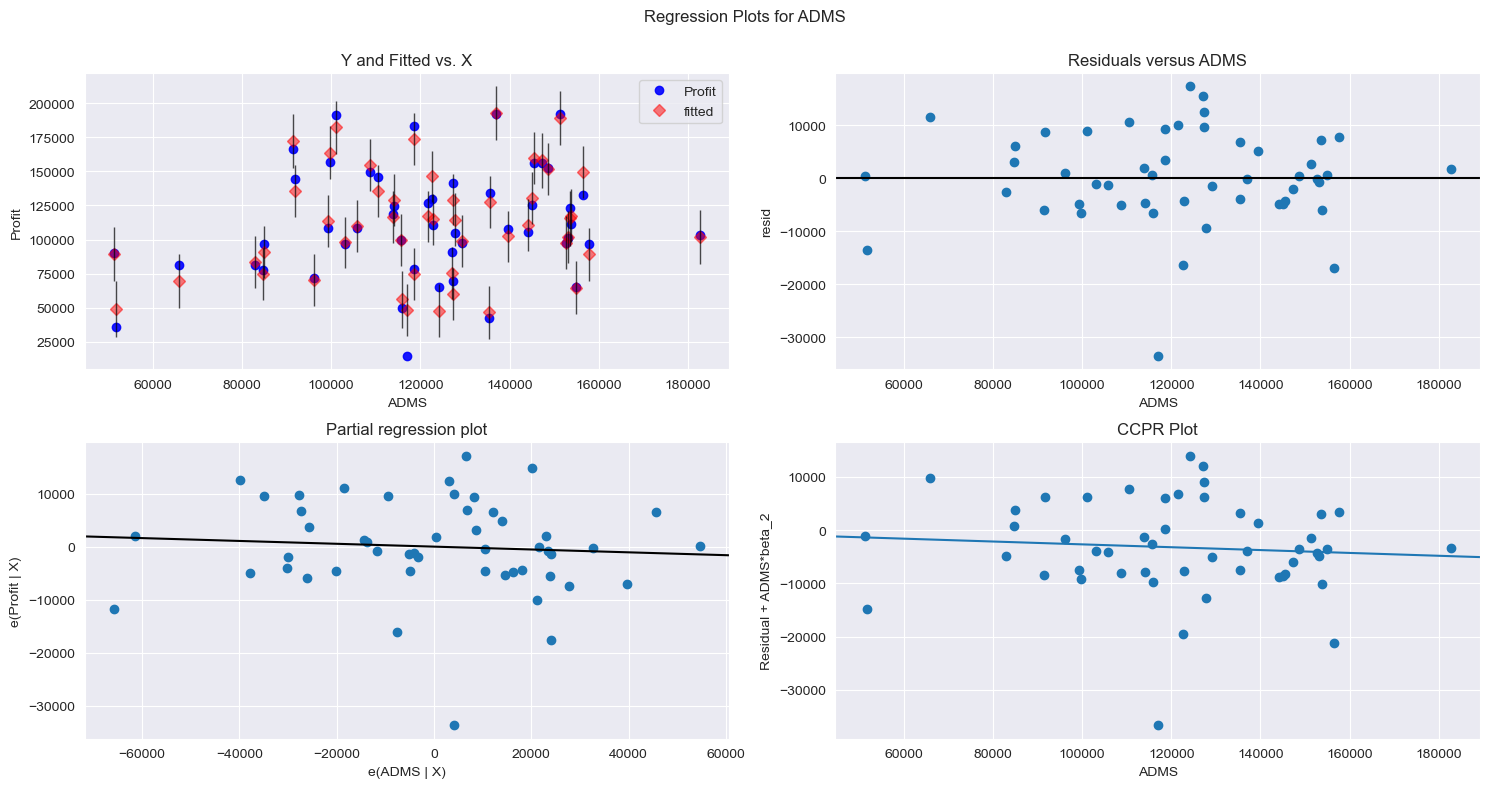

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


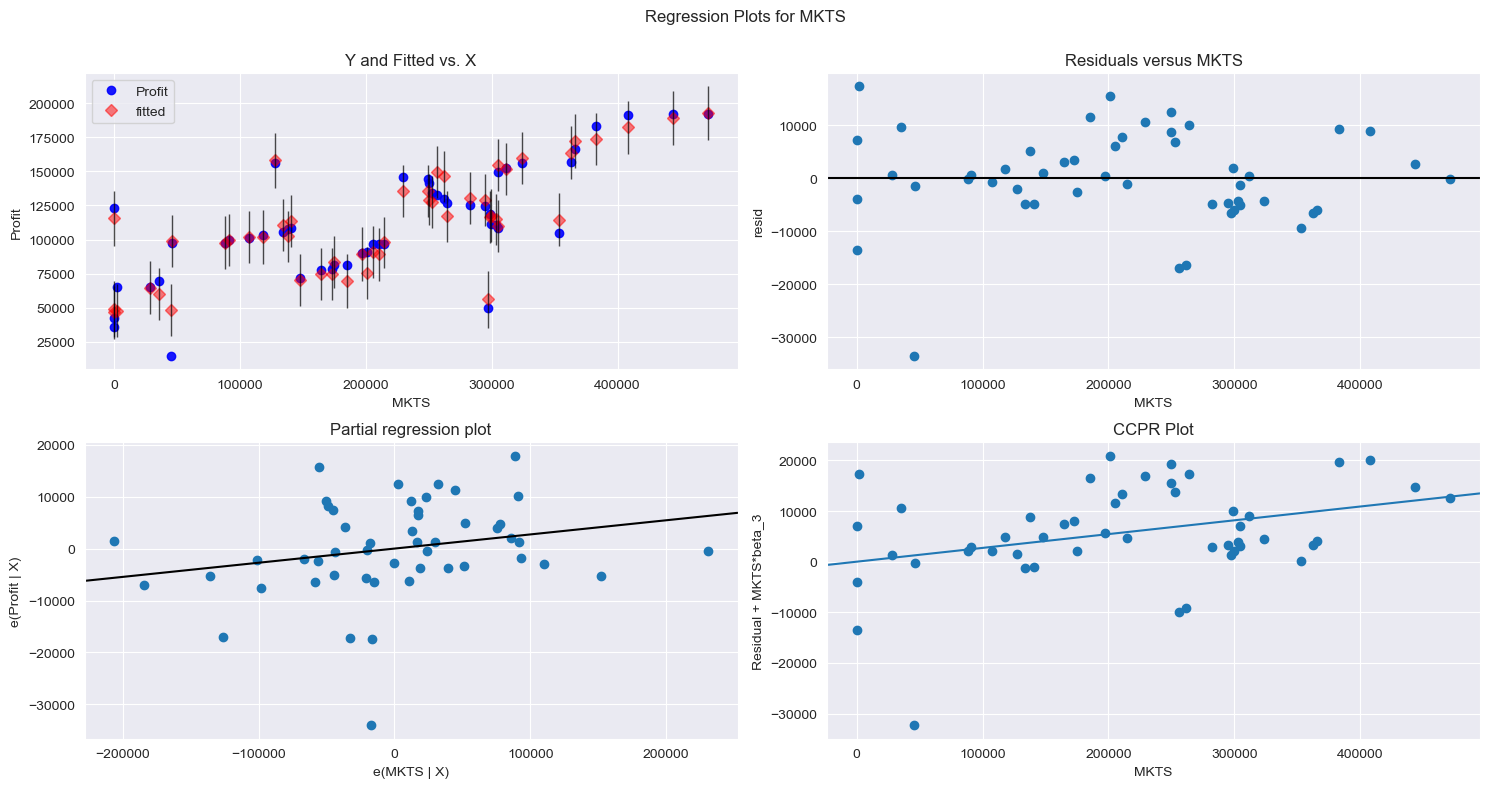

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics(checking Outliers or influencers)
#two Techniques:1.Cooks Distance & 2.Leverage Value

# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

In [25]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

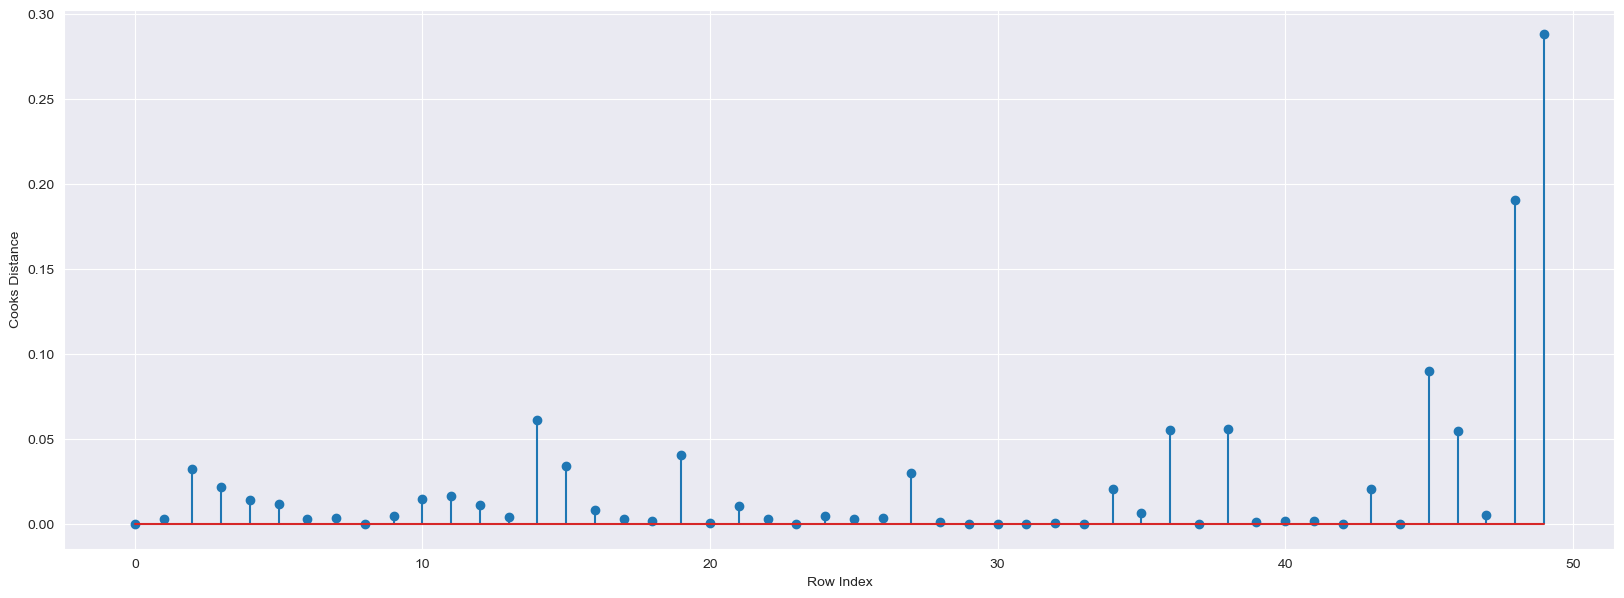

In [26]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

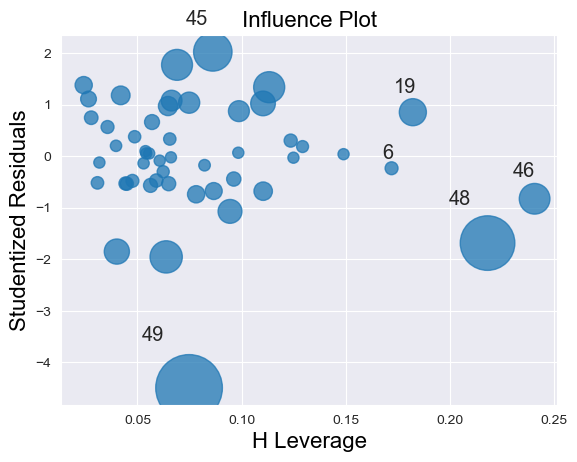

In [28]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [29]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [40]:
data1[data1.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [30]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [32]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


# Model Predictions

In [35]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [36]:
final_model.rsquared

0.9613162435129847

In [37]:
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [39]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table Containing R^2 Value for each prepared model 

In [40]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


#   Que_No_2

# Que_2 
#Consider only the below columns and prepare a prediction model for predicting price
#('price','Age_08_04','KM','HP','CC','doors','Gears','Quarterly_Taxd','Weight')


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [42]:
#Read the data
toyota_data = pd.read_csv("ToyotaCorolla.csv", encoding= 'unicode_escape')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [43]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [44]:
### EDA ###

In [45]:
toyota_temp = pd.concat([toyota_data.iloc[:,2:4], toyota_data.iloc[:,6],toyota_data.iloc[:,8], toyota_data.iloc[:,12:14],toyota_data.iloc[:,15:18]], axis=1)
toyota_temp

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [46]:
toyota1 = toyota_temp.rename({'Age_08_04':'Age', 'cc':'Cylinder_vol', 'Quarterly_Tax': 'Q_tax'}, axis=1)
toyota1

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [47]:
# CHECK FOR MISSING VALUES

toyota1.isna().sum()

Price           0
Age             0
KM              0
HP              0
Cylinder_vol    0
Doors           0
Gears           0
Q_tax           0
Weight          0
dtype: int64

In [48]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [49]:
toyota1.shape # row& column

(1436, 9)

In [50]:
toyota2= toyota1
toyota2 = toyota2.drop_duplicates().reset_index()

In [51]:
toyota2

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [52]:
toyota2= toyota2.drop(['index'], axis=1)
toyota2

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Correlation Matrix

In [53]:
toyota2.corr()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
Cylinder_vol,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Q_tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Scatterplot Between Variables along With Histograms

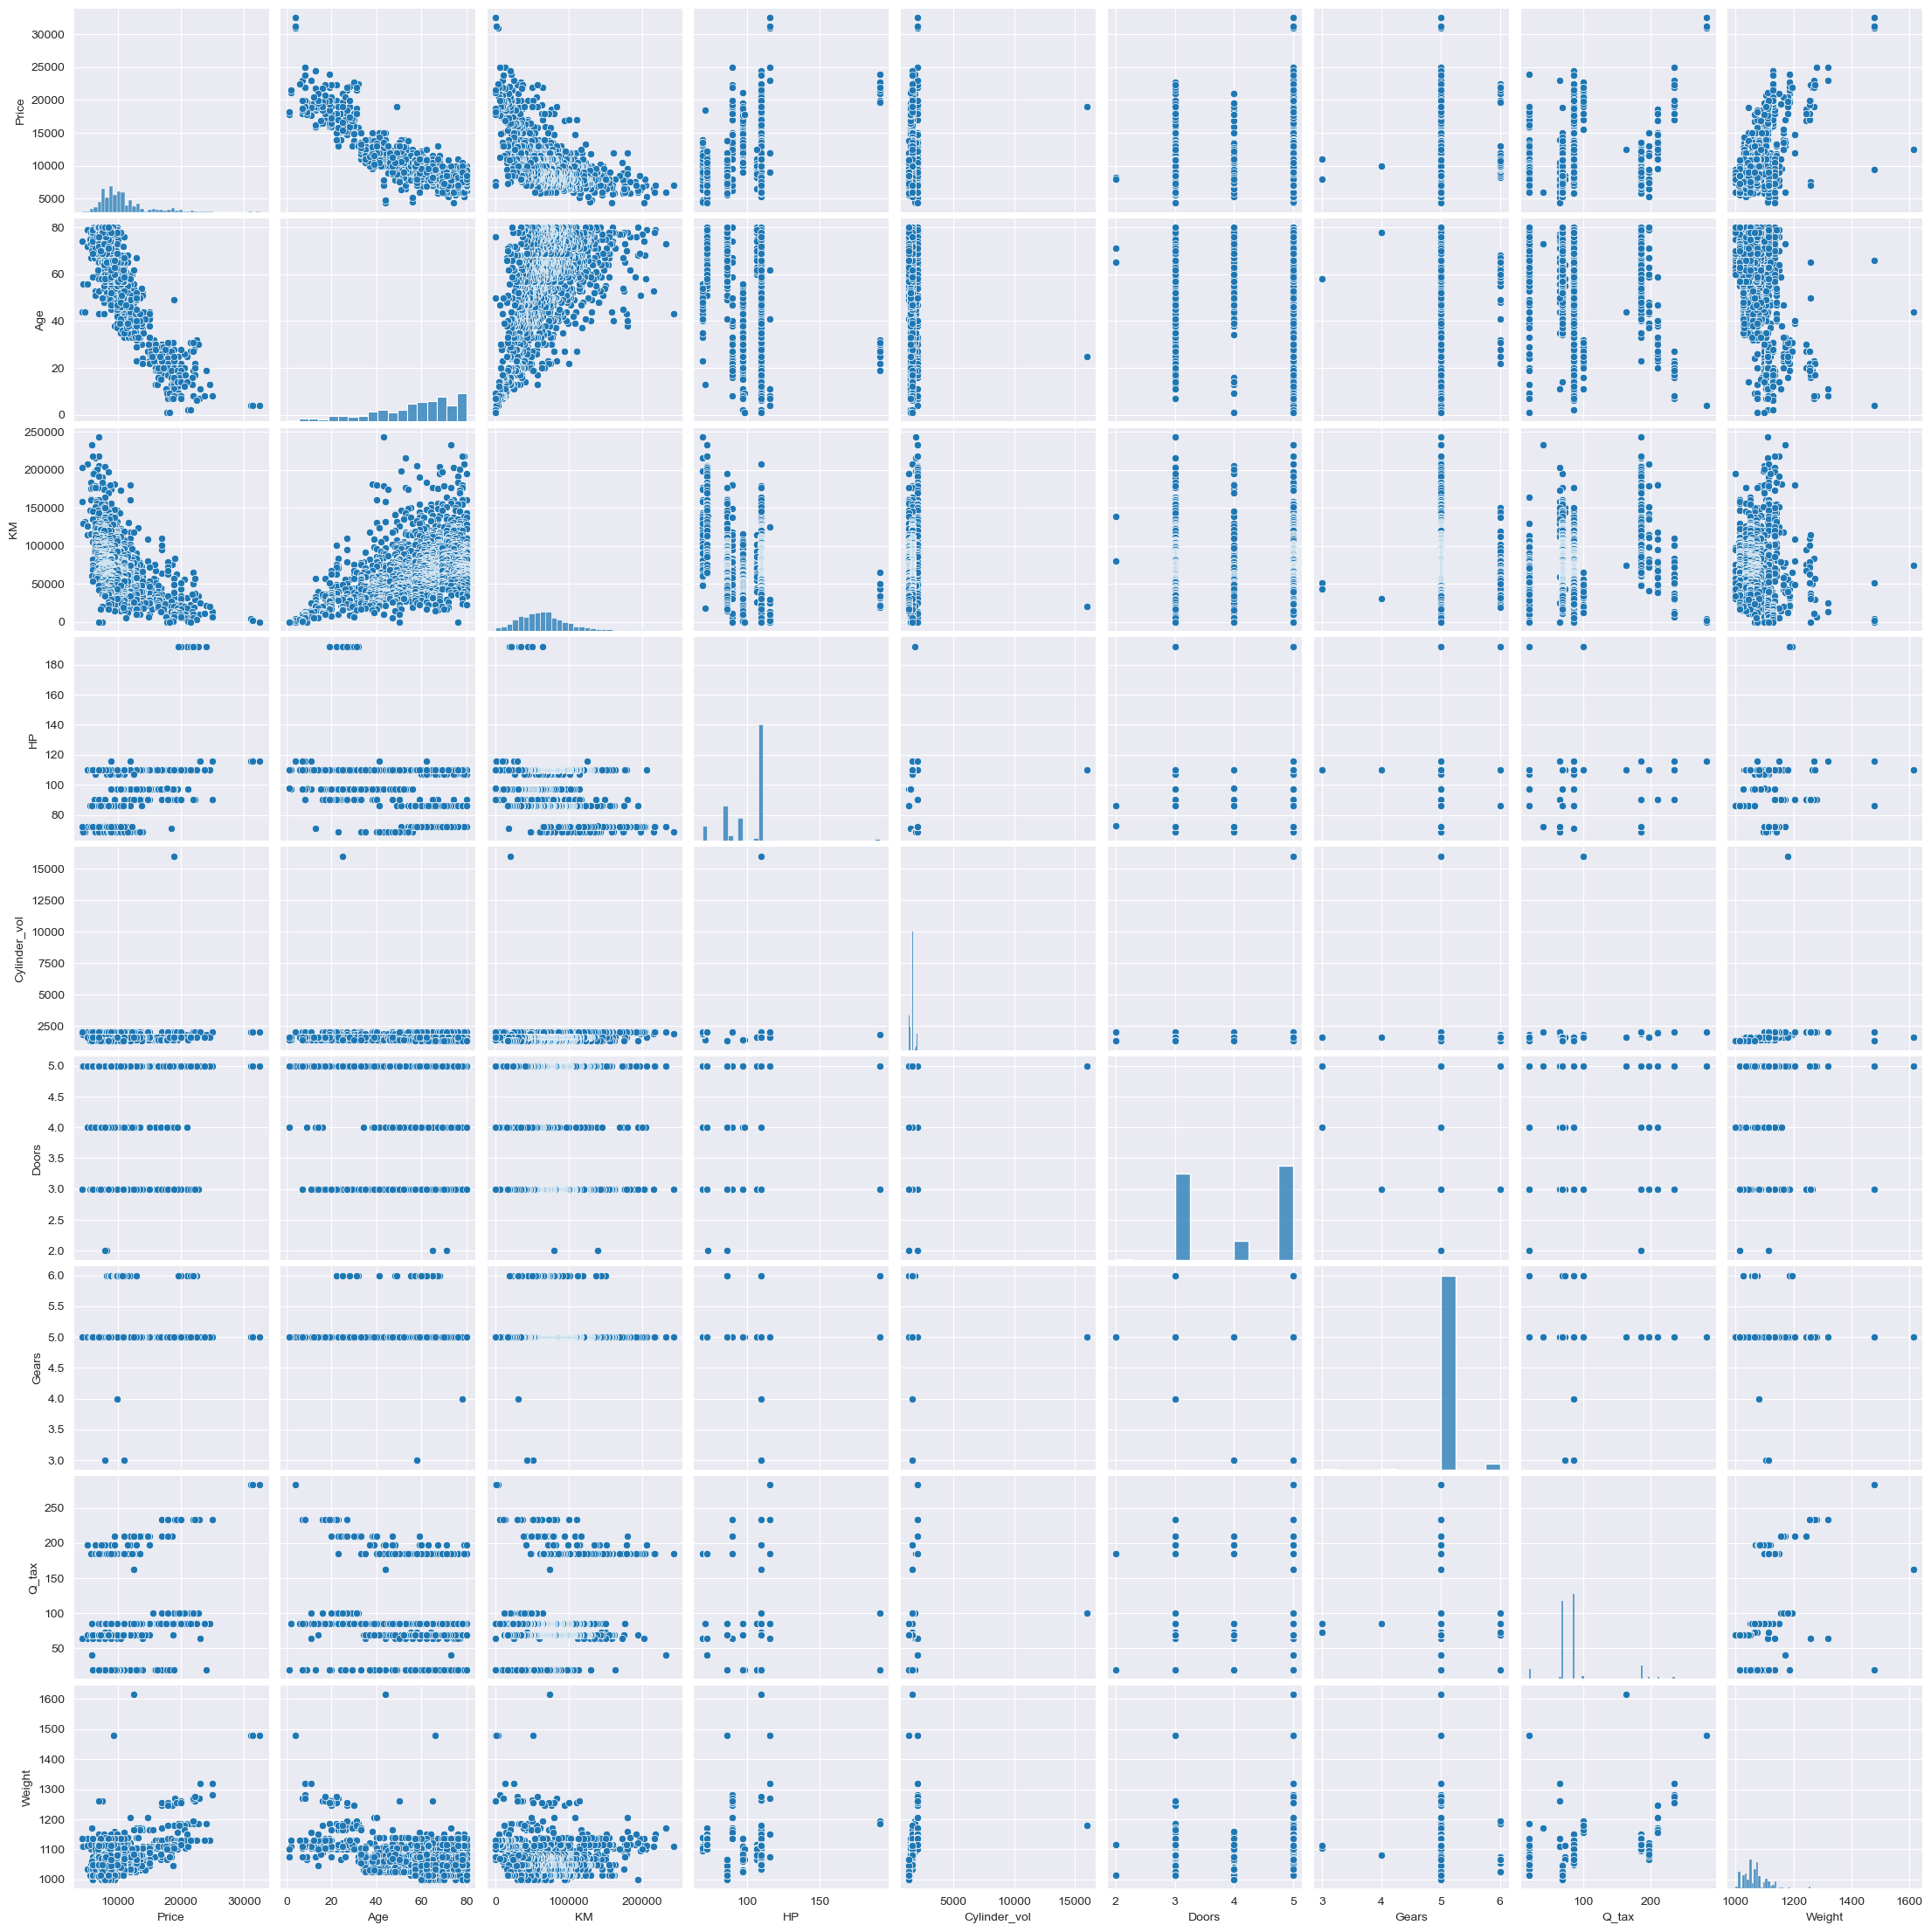

In [54]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)


# Standardizing Data

In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
toyota2_scale = scale.fit_transform(toyota2)

In [56]:
toyota2_scale

array([[ 0.77036821, -1.77726827, -0.57595832, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.83966875, -1.77726827,  0.11647404, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.89510918, -1.72337979, -0.71670745, ..., -0.14047507,
         3.00351318,  1.77496405],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-0.96214536,  0.75549016, -1.37829506, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-1.04530601,  1.07882103, -1.82962616, ..., -0.14047507,
        -1.66124526,  0.7985824 ]])

In [57]:
toyota_df = pd.DataFrame(toyota2_scale)
toyota_df.head()

,0,1,2,3,4,5,6,7,8
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688


In [58]:
# Adding column names to data frame
toyota_df.columns=['Price',	'Age',	'KM',	'HP',	'Cylinder_vol',	'Doors',	'Gears',	'Q_tax',	'Weight']
toyota_df.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688


# Preparing a Model

#Build model

In [59]:
model = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:03:10   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM              -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP              31.5846      2.818     11.210      0.000      26.058      37.112
Cylinder_vol    -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors           -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears          597.7159    196.969      3.035      0.002     211.335     984.097
Q_tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [62]:
#Coefficients
model.params

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
Cylinder_vol      -0.118558
Doors             -0.920189
Gears            597.715894
Q_tax              3.858805
Weight            16.855470
dtype: float64

# Simple Linear Regression Models

In [64]:
ml_C_vol=smf.ols('Price ~ Cylinder_vol',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)

Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


In [65]:
#cylinder_vol is significant when taken independently
ml_C_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           2.29e-06
Time:                        00:03:38   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9053.5368    363.894     24.880      0.000    8339.715    9767.359
Cylinder_vol     1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
ml_D=smf.ols('Price ~ Doors',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)  


Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


In [67]:
ml_D.summary()  #Doors is also significant whwn taken independantly

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           2.40e-12
Time:                        00:03:46   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# BUILDING MODEL USING CYLINDER_VOL AND DOORS AS INDEPENDENT VARIABLES

# price~cylinder_vol+Doors

In [68]:
ml_C_D=smf.ols('Price~Cylinder_vol+Doors',data = toyota2).fit()  
print(ml_C_D.tvalues, '\n', ml_C_D.pvalues)  

Intercept       12.786341
Cylinder_vol     4.268006
Doors            6.752236
dtype: float64 
 Intercept       1.580945e-35
Cylinder_vol    2.101878e-05
Doors           2.109558e-11
dtype: float64


# Model Validation
#calculating VIF VALUES TO CHECK COLLINEARITY

In [69]:
rsq_Age = smf.ols('Age ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM ~ Age+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP ~ KM+Age+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CV = smf.ols('Cylinder_vol ~ KM+HP+Age+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_CV = 1/(1-rsq_CV)

rsq_D = smf.ols('Doors ~ KM+HP+Cylinder_vol+Age+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_D = 1/(1-rsq_D)

rsq_G = smf.ols('Gears ~ KM+HP+Cylinder_vol+Doors+Age+Q_tax+Weight',data=toyota2).fit().rsquared
vif_G = 1/(1-rsq_G)
rsq_QT = smf.ols('Q_tax ~ KM+HP+Cylinder_vol+Doors+Gears+Age+Weight',data=toyota2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_W = smf.ols('Weight ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Age',data=toyota2).fit().rsquared
vif_W = 1/(1-rsq_W)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Cylinder_vol', 'Doors', 'Gears', 'Q_tax', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CV, vif_D, vif_G, vif_QT,vif_W]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,Cylinder_vol,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Q_tax,2.295375
7,Weight,2.487180


# All the variables have vif < 20, therfore no multicolinearty in variables.
# so we will consider all the variables in model building

# Residual Analysis
#Test for Normality of Residuals(Q-Q Plot)

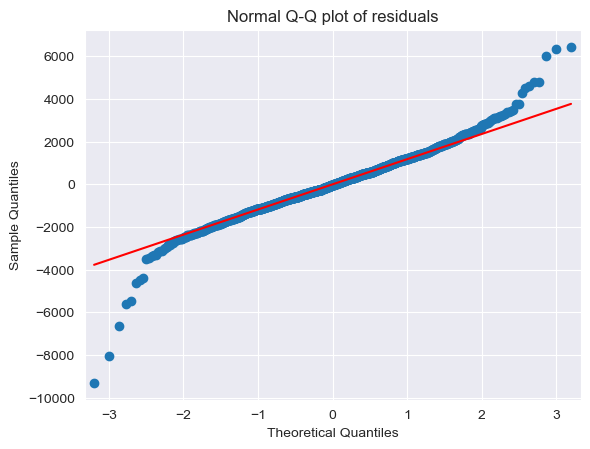

In [70]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [71]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [72]:
list(np.where(model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

# Residual Plot for Homoscedasticity

In [73]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # z = (x-mu)/sigma

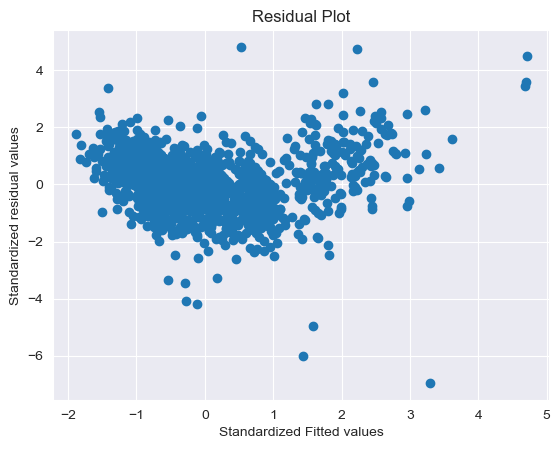

In [74]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Test for errors (residual Vs Regressors)

eval_env: 1


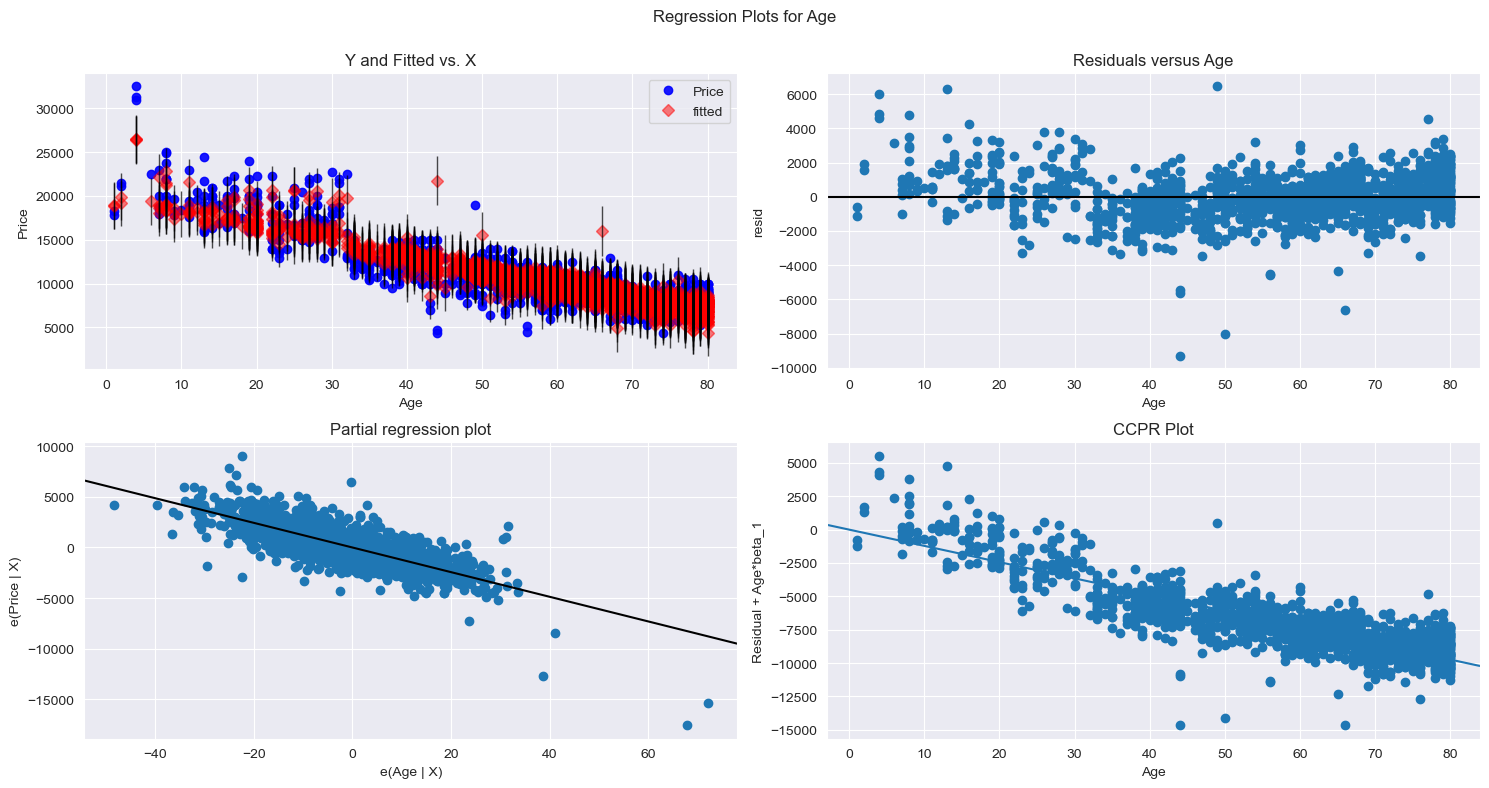

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


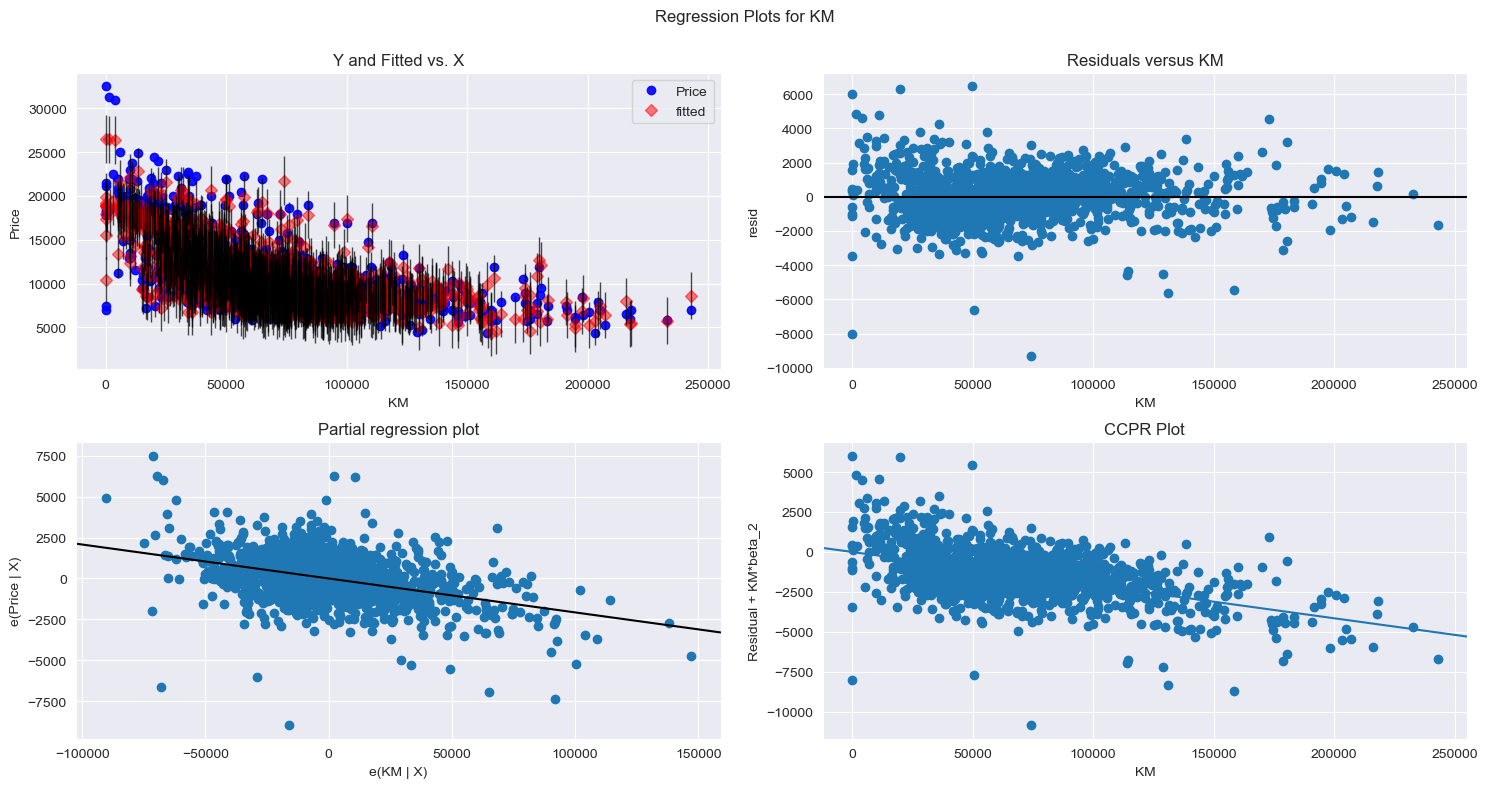

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


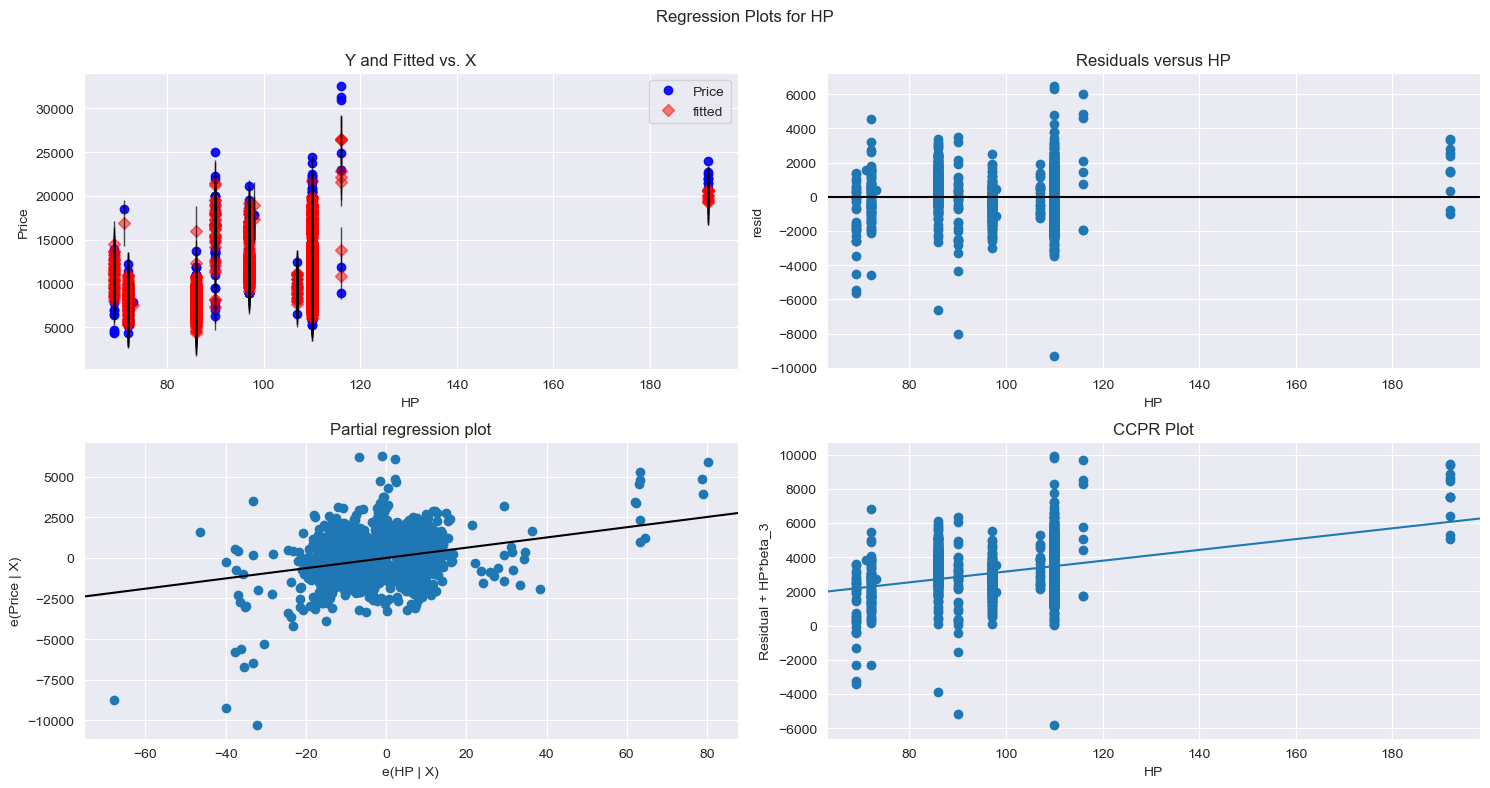

In [77]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


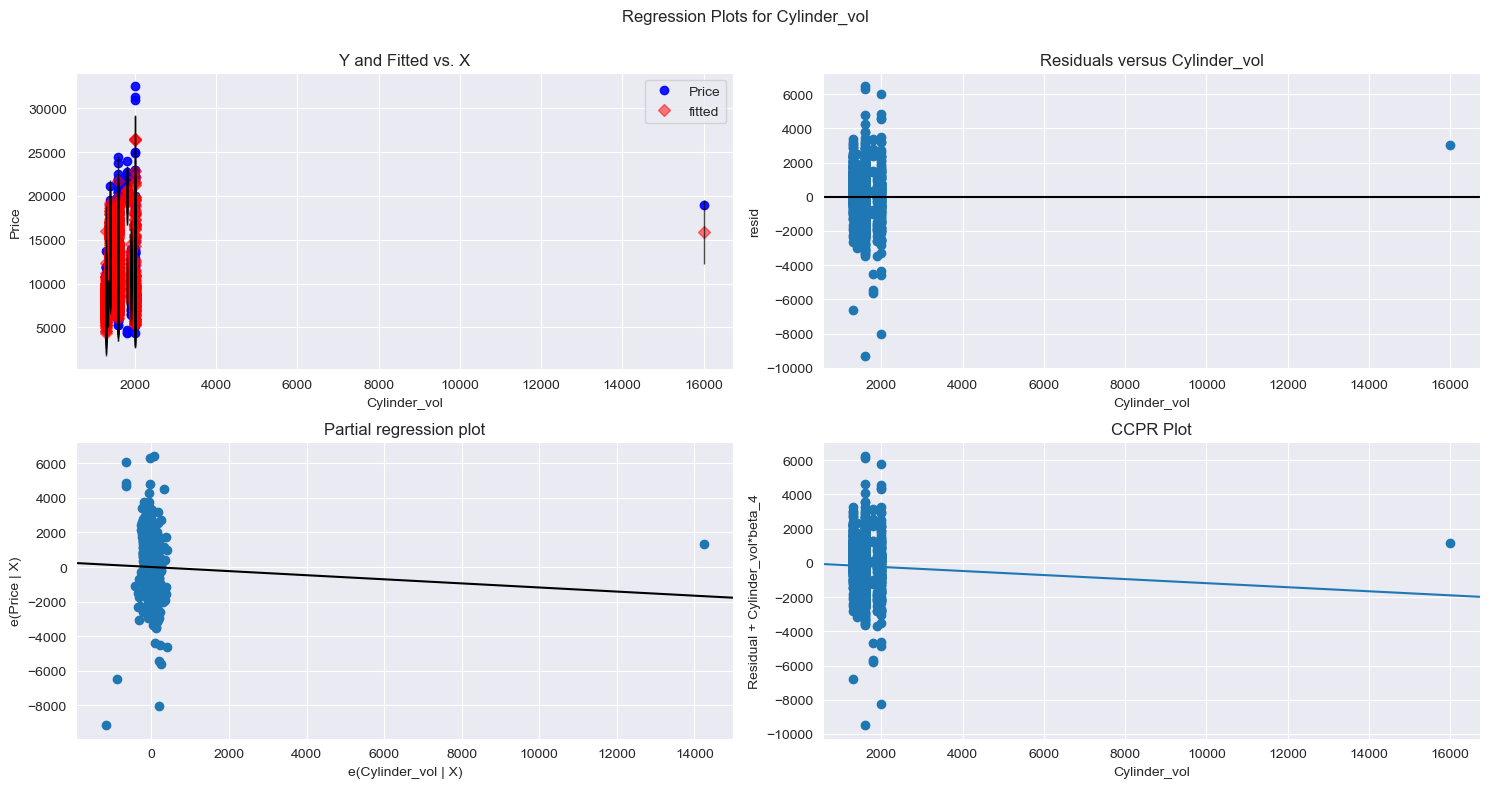

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Cylinder_vol", fig=fig)
plt.show()

eval_env: 1


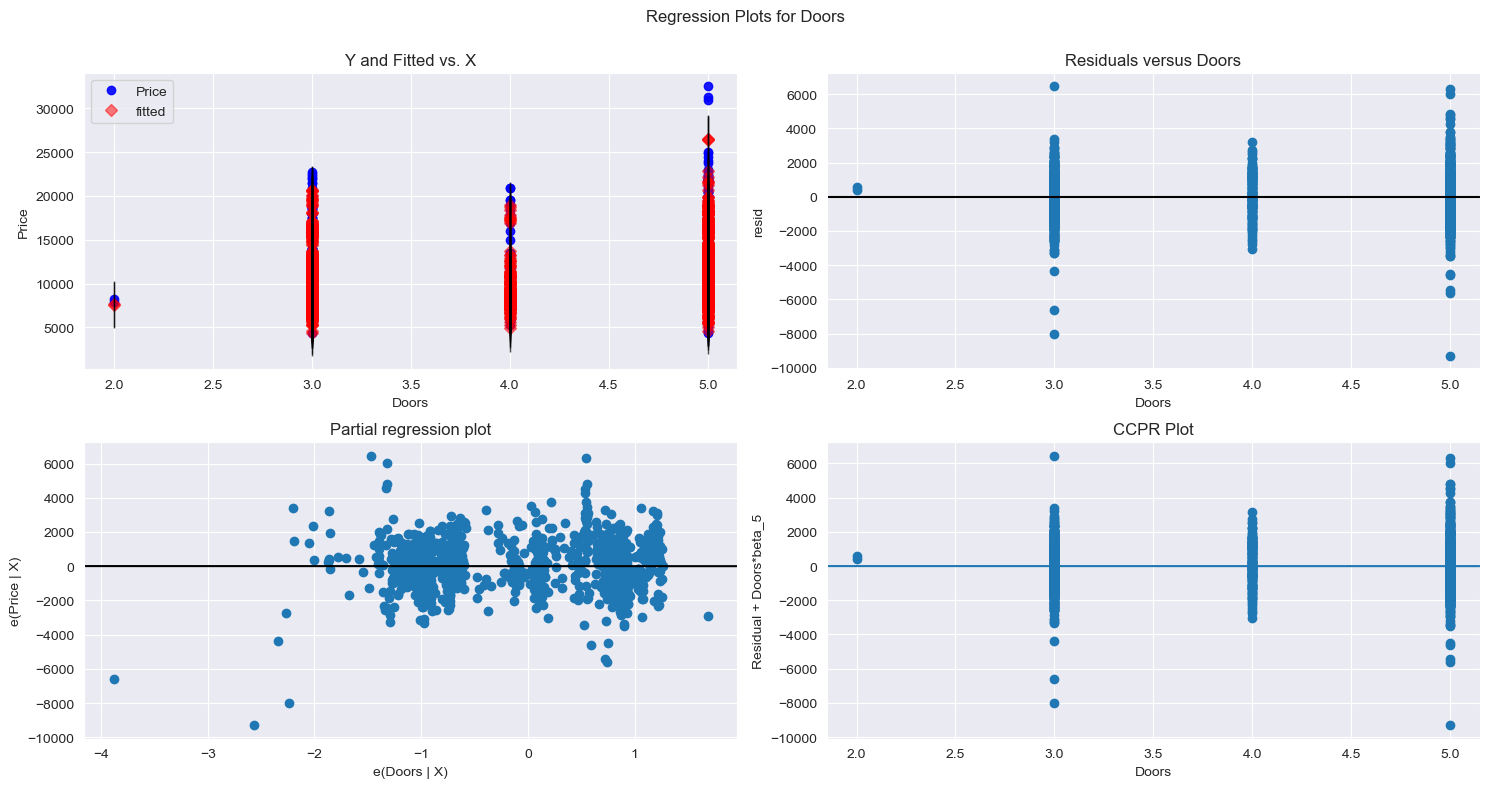

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


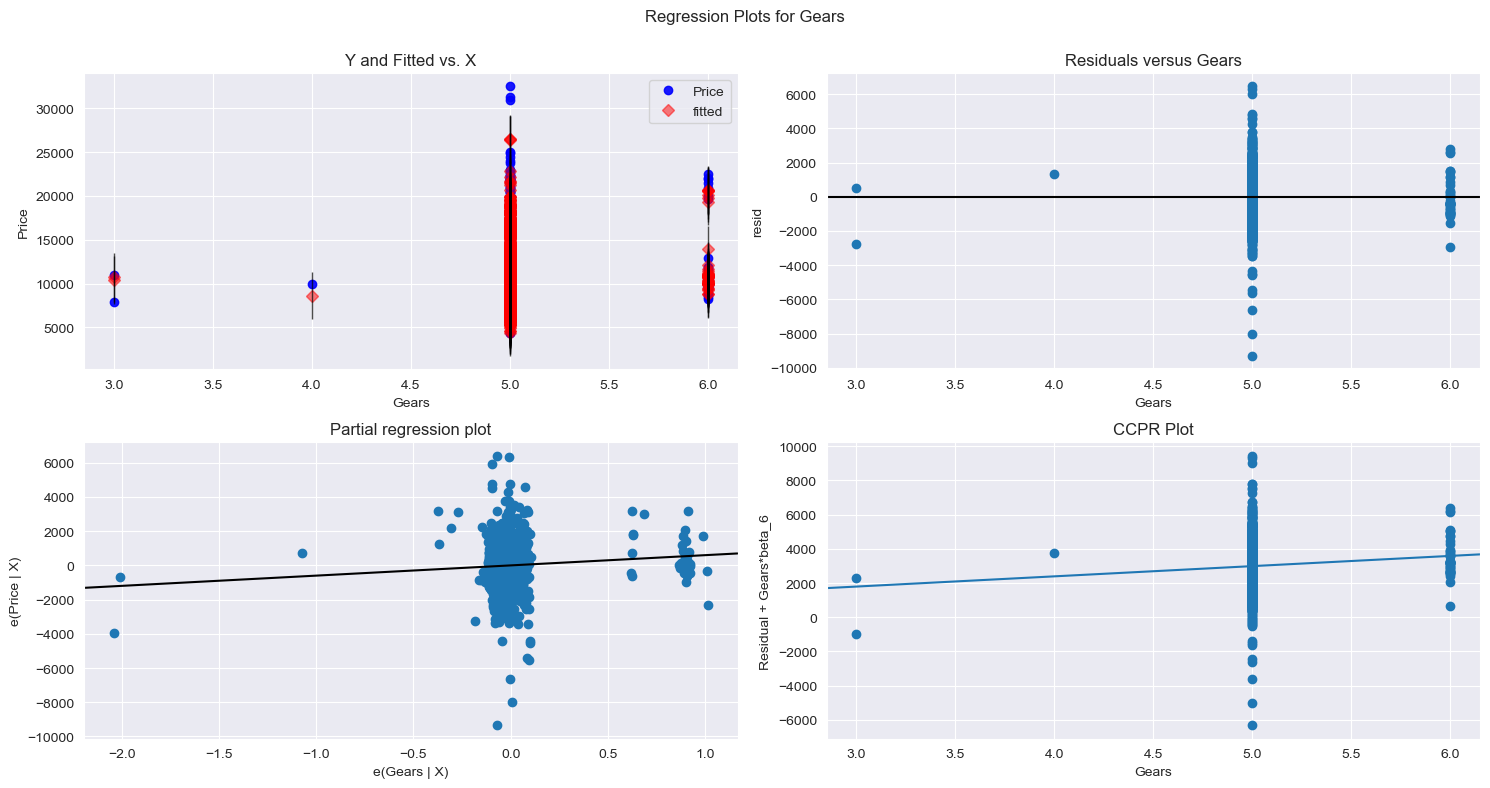

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


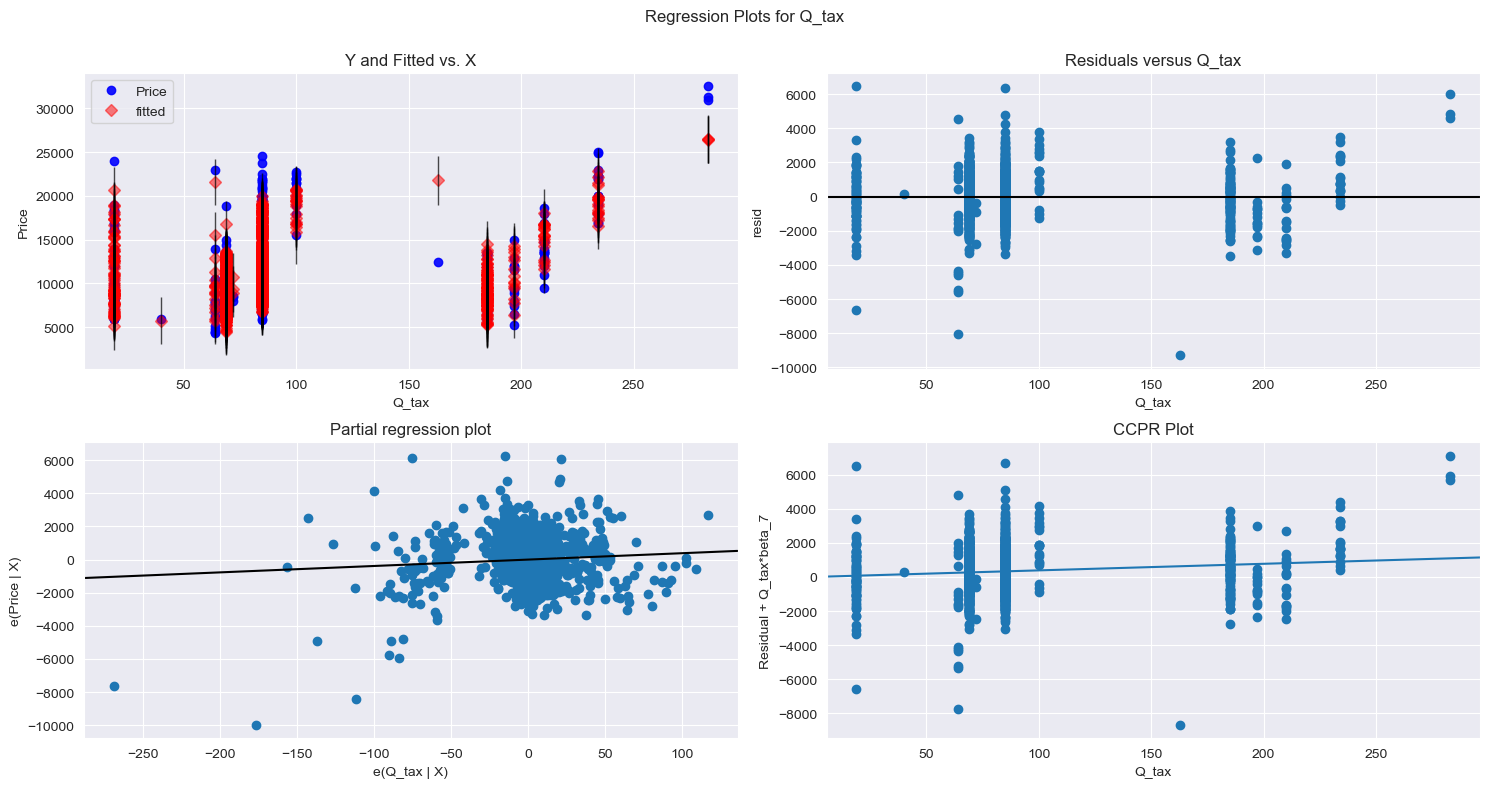

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Q_tax", fig=fig)
plt.show()

eval_env: 1


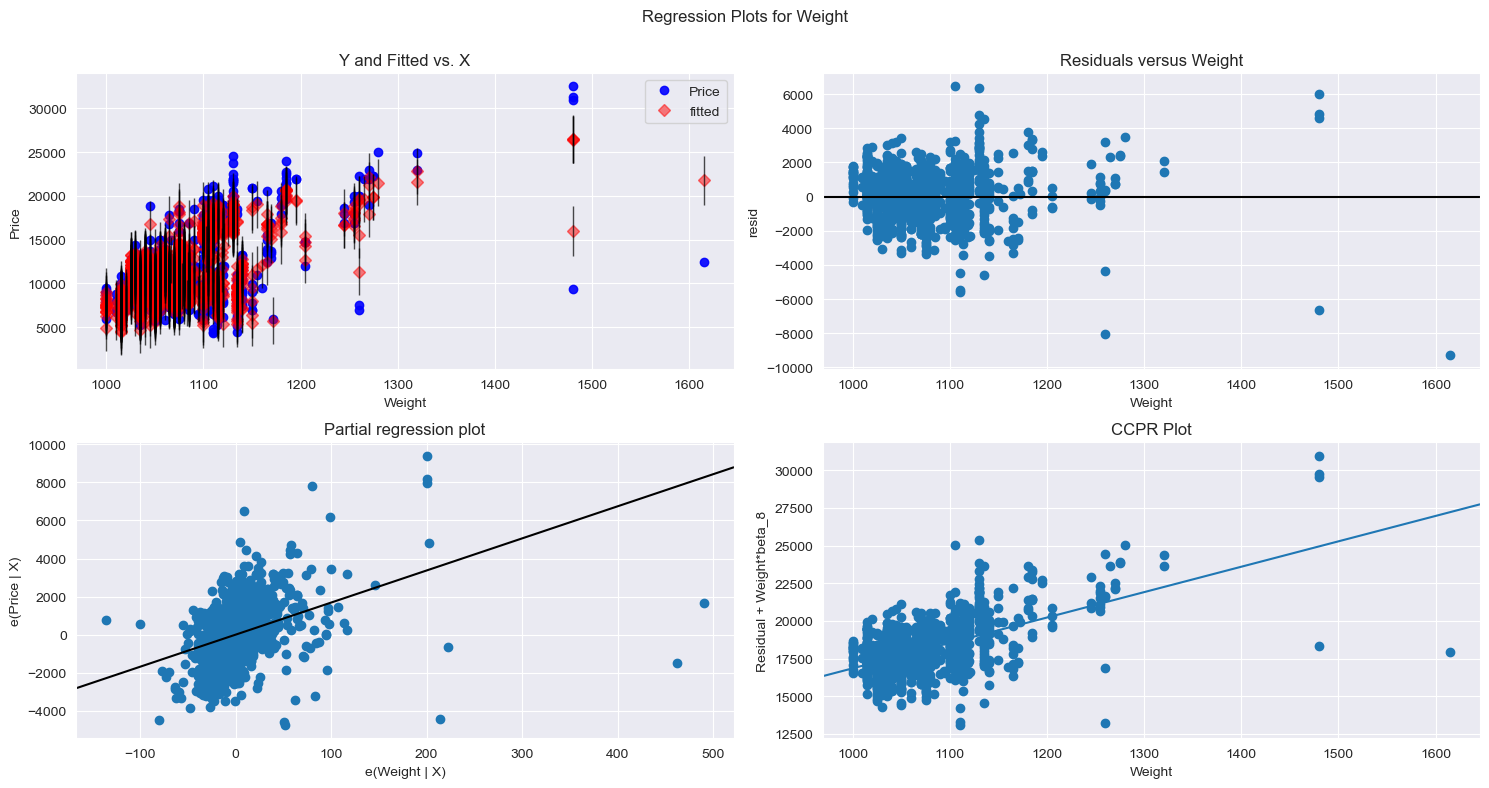

In [82]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Detection Diagnostics Detecting Influencers 
#Outliers Cooks Distance

In [83]:
model_influence = model.get_influence() # get_influence() drived from our model i.e "model"
(c, _) = model_influence.cooks_distance

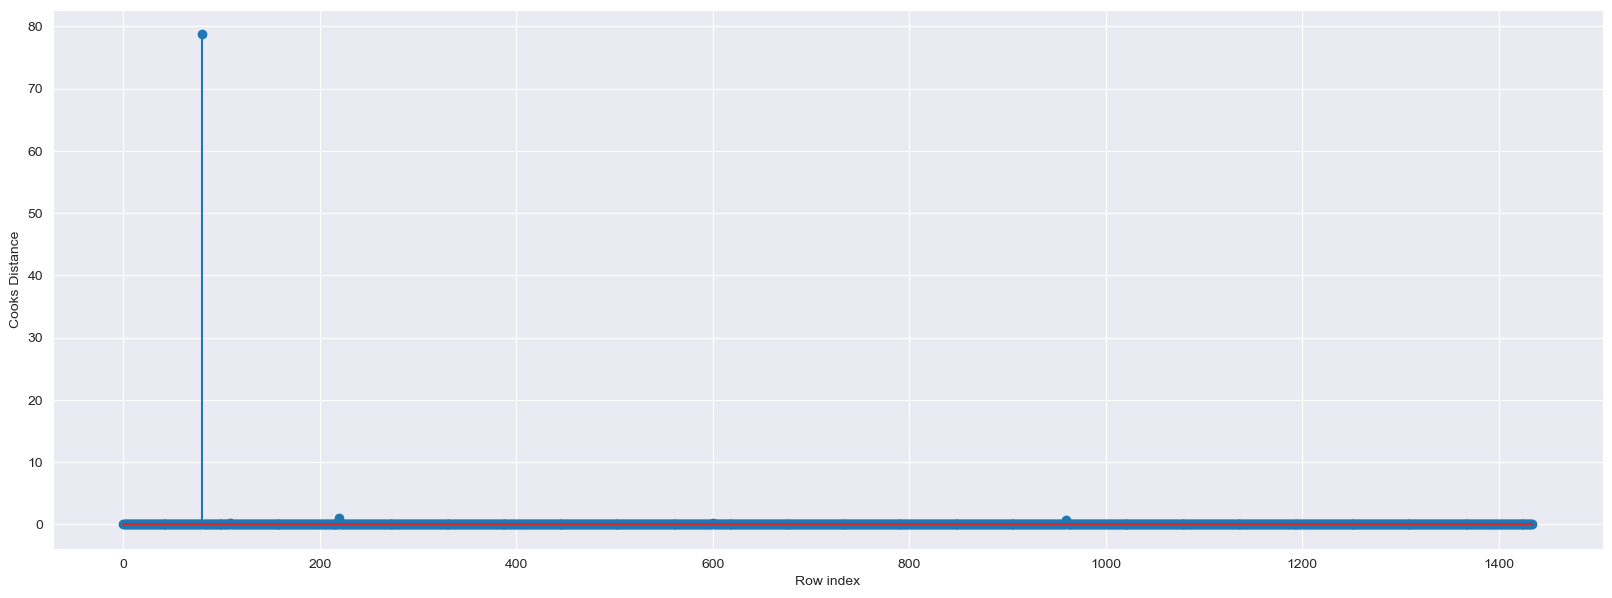

In [84]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

# High influence points(Leverage value)

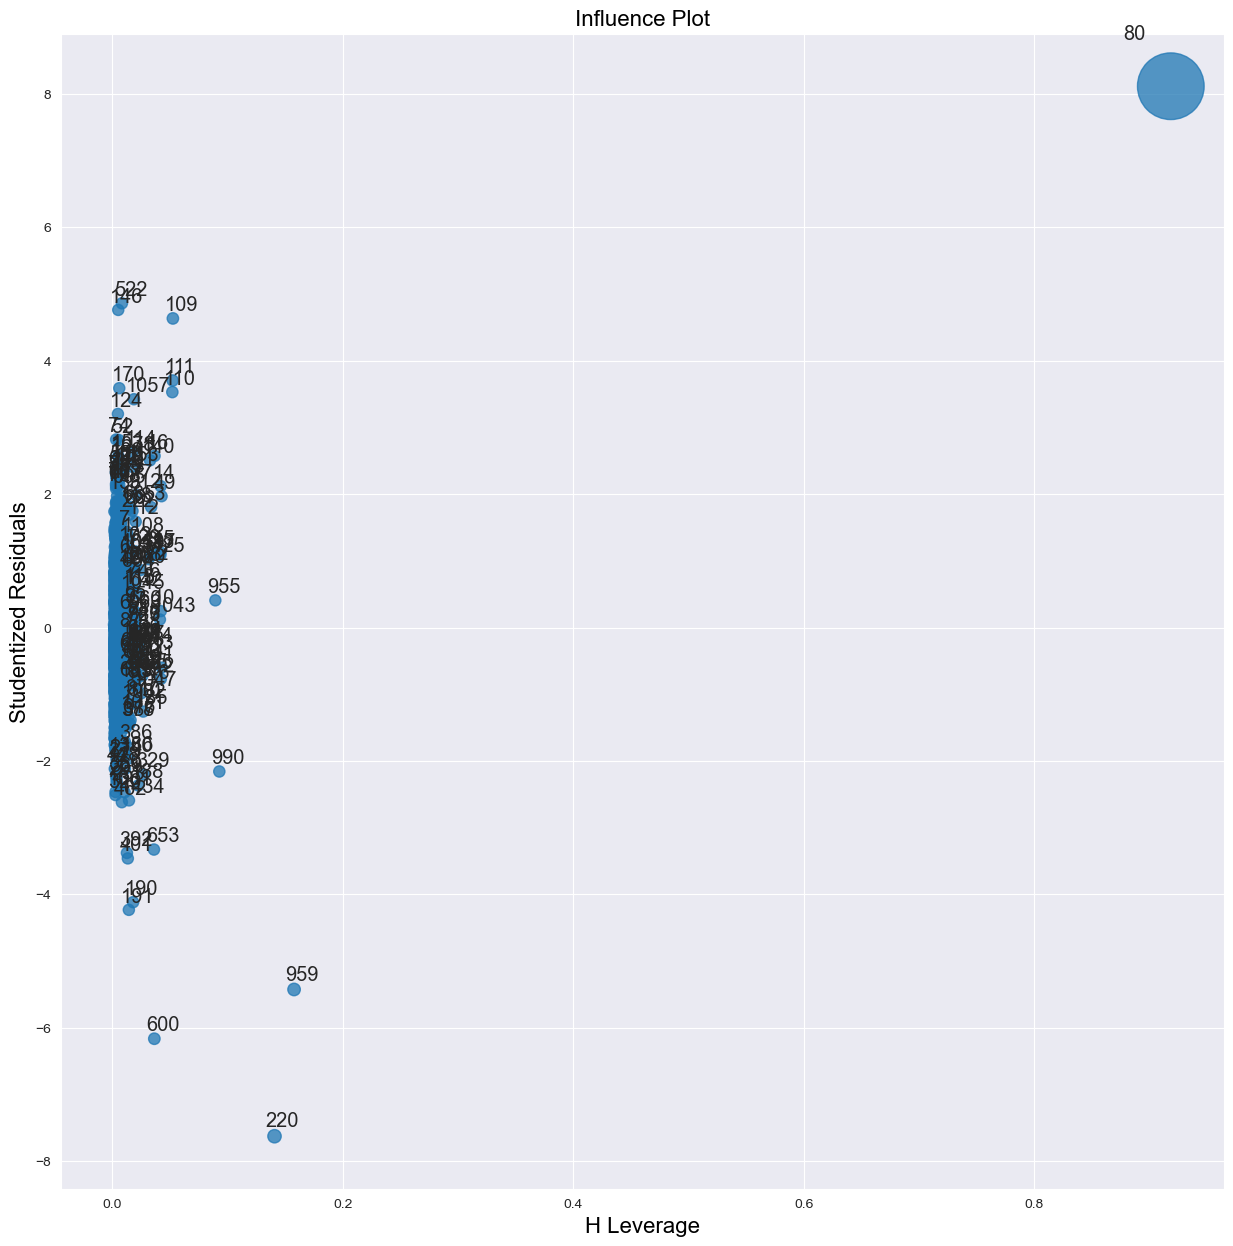

In [86]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax = plt.subplots(figsize=(15, 15))
influence_plot(model, ax= ax)
plt.show()

In [87]:
k = toyota2.shape[1] # K is no. of columns

n = toyota2.shape[0] # n is no. of rows
print(k, n)

leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff) 


9 1435
0.020905923344947737


In [88]:
toyota2[toyota2.index.isin([80])]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [89]:
#See the differences in HP, Doors and other variable values
toyota2.head(15)

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [90]:
#Load the data
toyota3 = toyota2

In [91]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota3=toyota3.drop(toyota3.index[[80]],axis=0).reset_index()

In [92]:
toyota3

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [93]:
#Drop the original index
toyota3=toyota3.drop(['index'],axis=1)

In [94]:
toyota3.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Rebuild Model

In [95]:
#Rebuild model and generate R-Squared and AIC values
#
model1 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota3).fit()

In [96]:
(model1.rsquared,model1.aic)

(0.8681163912634053, 24669.363894157)

In [97]:
#calculating cooks Distance
model1_influence = model1.get_influence() # get_influence() drived from our model i.e 'model1"
(c1, _) = model1_influence.cooks_distance  # Cook’s Distance

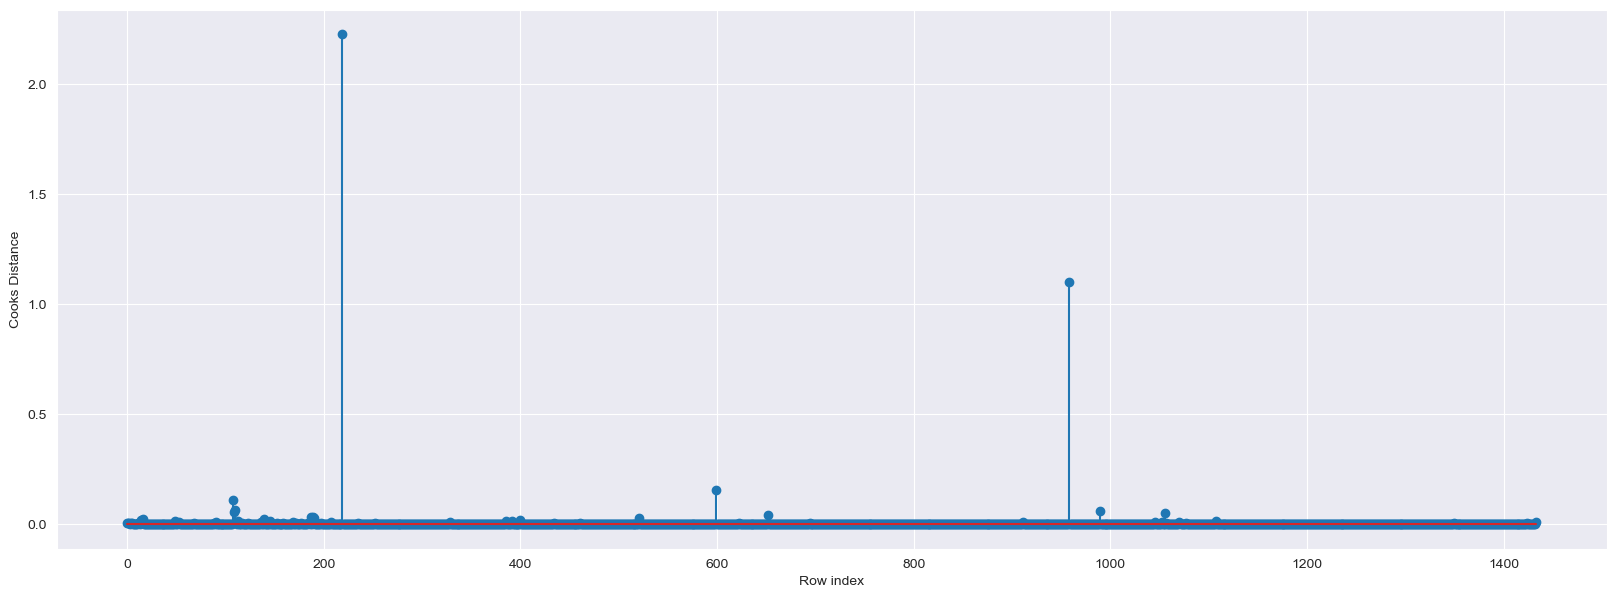

In [98]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [99]:
#index of the data points where c is more than 1
(np.argmax(c1),np.max(c1))

(219, 2.2253513655270813)

In [100]:
toyota3[toyota3.index.isin([219])]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [101]:
#Drop 219th observation
#219th observation is outlier having value more than 1
toyota4 = toyota3
toyota4=toyota4.drop(toyota4.index[[219]],axis=0) 

In [102]:
toyota4

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [103]:
#Reset the index and re arrange the row values
toyota4=toyota4.reset_index()

In [104]:
toyota4

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [105]:
# drop the original index
toyota4=toyota4.drop(['index'],axis=1)

In [106]:
toyota4.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Rebuild Model
#Build the model on the new data

In [107]:
model2 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota4).fit()
(model2.rsquared,model2.aic)

(0.8765926307402282, 24557.748263908954)

In [108]:
#Again check for influencers (Cook's Distance)
(c2, _) = model2.get_influence().cooks_distance

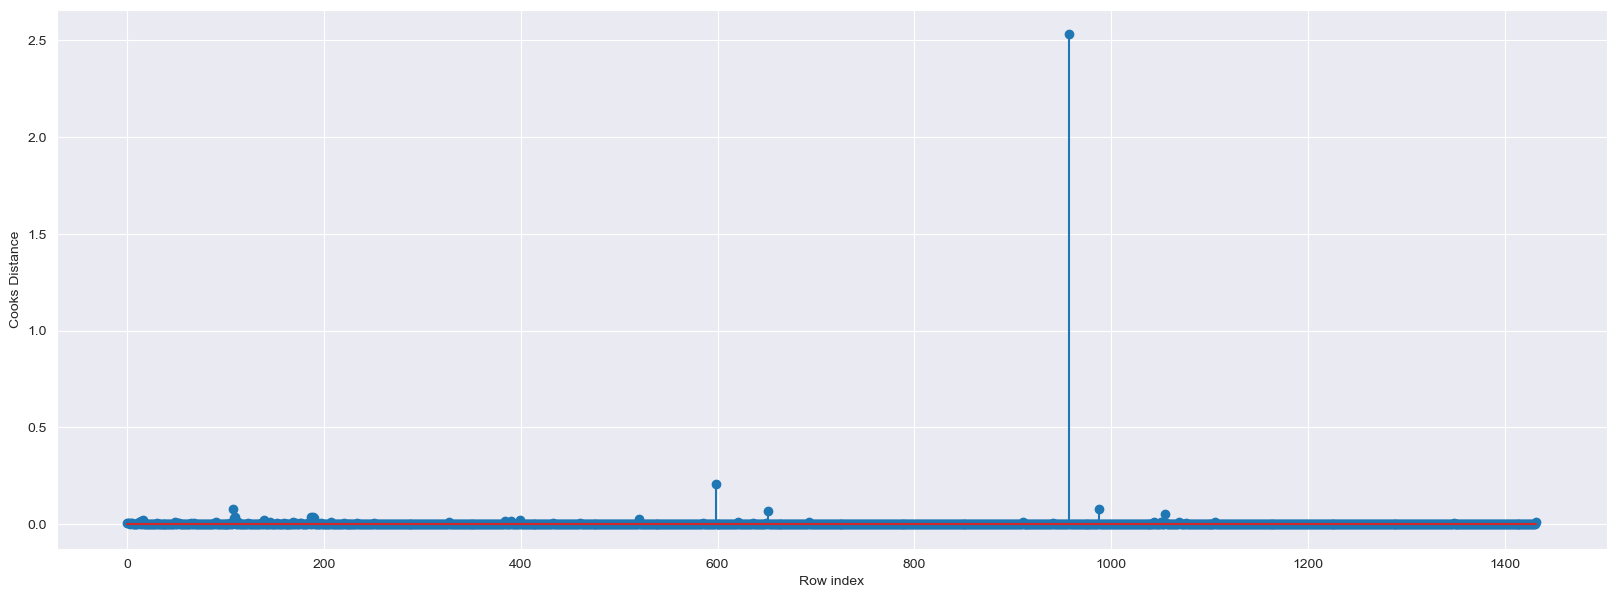

In [109]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [110]:
#index of the data points where c is more than 1
(np.argmax(c2),np.max(c2))

(957, 2.530779623276654)

In [111]:
toyota4[toyota4.index.isin([957])]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
957,9390,66,50806,86,1300,3,5,19,1480


# Visualize the difference between 957th record and rest other records

In [112]:

toyota4.head()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [113]:
#Drop 957th observation
#957th observation is outlier having cook's distance more than 1
toyota5 = toyota4
toyota5=toyota5.drop(toyota5.index[[957]],axis=0) 

In [114]:
toyota5

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [115]:
#Reset the index and re arrange the row values
toyota5=toyota5.reset_index()

In [116]:
toyota5

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1428,7500,69,20544,86,1300,3,5,69,1025
1428,1429,10845,72,19000,86,1300,3,5,69,1015
1429,1430,8500,71,17016,86,1300,3,5,69,1015
1430,1431,7250,70,16916,86,1300,3,5,69,1015


In [117]:
# drop the original index
toyota5=toyota5.drop(['index'],axis=1)

In [118]:
toyota5

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


# Rebuild model

In [120]:
#Build the model on the new data
model3 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota5).fit()
(model3.rsquared,model3.aic)

(0.8839684606741538, 24453.23573612724)

In [121]:
#Again check for influencers (Cook's Distance)

(c3, _) = model3.get_influence().cooks_distance

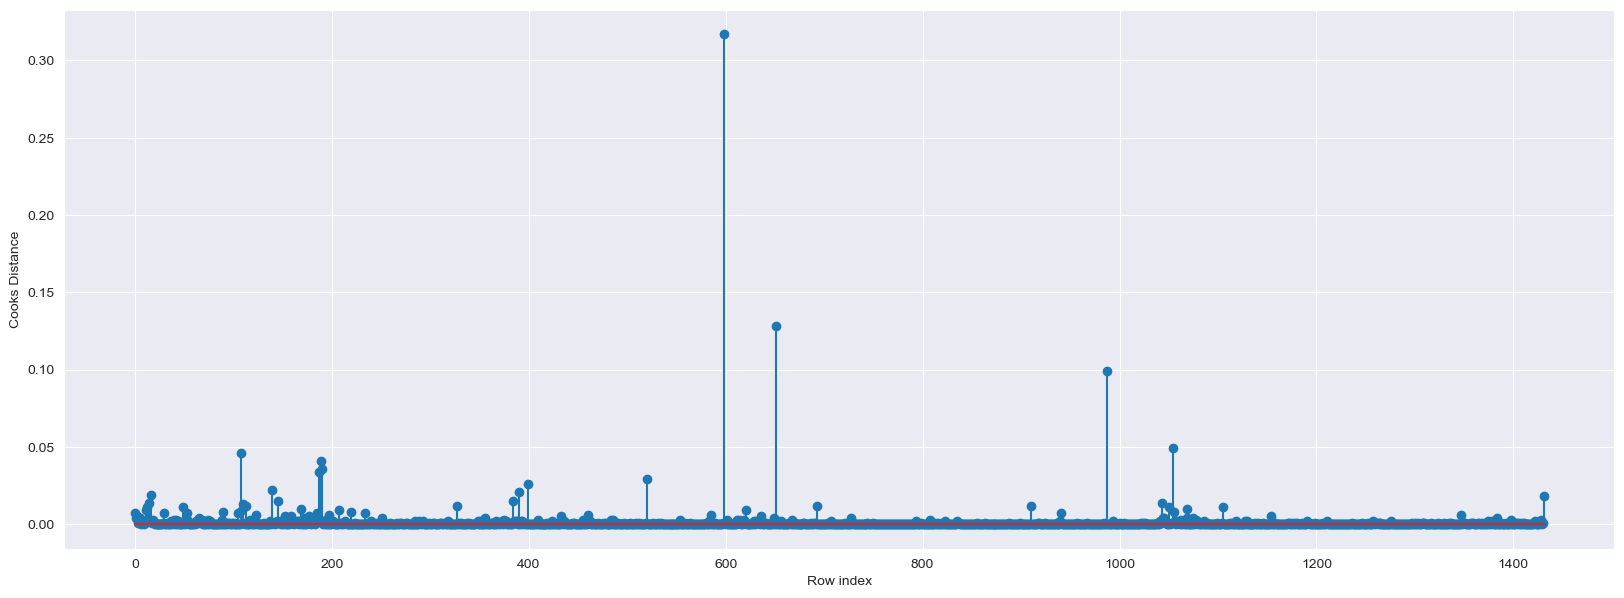

In [122]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota5)),np.round(c3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [123]:
# Since cook's distance is < 1, therefore we stop the model deletion
(np.argmax(c3),np.max(c3))

(598, 0.31689035401452564)

# since cooks distance= 0.31689 which is <1,therefore we stop the model deletion and finalize the model

# Final Model###
# model3 is our final model with
# rsquare = 0.8839684606741538, aic=24453.23573612724)
#Thus the model accuracy impoved to 88.396%

# Model Prediction ###

In [124]:
# let the data for prediction is
pred_data=pd.DataFrame({'Age':6,"KM":40000,"HP":80,"Cylinder_vol":1800, "Doors":4,"Gears":5,"Q_tax": 350, "Weight":1304},index=[0])
pred_data

,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,6,40000,80,1800,4,5,350,1304


In [125]:
model3.predict(pred_data)

0    23593.052465
dtype: float64

In [126]:
# prediction for original data with 88% accuracy
pred_price = model3.predict(toyota1)
pred_price

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1431     9114.821644
1432     8499.169594
1433     8644.902871
1434     8758.662855
1435    10638.570082
Length: 1436, dtype: float64